In [782]:
#Import libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data from CSV file.


In [784]:
df=pd.read_csv('Indian Startup.csv')

# Data Cleaning

In [785]:
#To Find number of Rows, Columns of data
df.shape

(1208, 10)

In [786]:
df.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
0,CollegeDekho,2015,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC","$35,000,000",Series B,Dec-21
1,BOX8,2012,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,"$40,000,000",NaN,Dec-21
2,Simpl,2015,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures","$40,000,000",Series B,Dec-21
3,8i Ventures,2018,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,"$50,000,000",NaN,Dec-21
4,PayGlocal,2021,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,"$4,900,000",Series A,Dec-21


In [787]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1208 non-null   object
 1   Founded        1208 non-null   int64 
 2   Headquarters   1207 non-null   object
 3   Sector         1208 non-null   object
 4   What it does   1208 non-null   object
 5   Founder/s      1204 non-null   object
 6   Investor/s     1140 non-null   object
 7   Amount         1064 non-null   object
 8   Stage          780 non-null    object
 9   Date           1208 non-null   object
dtypes: int64(1), object(9)
memory usage: 94.5+ KB


In [788]:
#Removed Stage Column which is not required for the analysis
df.drop('Stage',axis=1,inplace=True)

In [791]:
df.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Date
0,CollegeDekho,2015,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC","$35,000,000",Dec-21
1,BOX8,2012,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,"$40,000,000",Dec-21
2,Simpl,2015,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures","$40,000,000",Dec-21
3,8i Ventures,2018,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,"$50,000,000",Dec-21
4,PayGlocal,2021,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,"$4,900,000",Dec-21


In [792]:
#To find number of null values from each column
pd.isnull(df).sum()

Company/Brand      0
Founded            0
Headquarters       1
Sector             0
What it does       0
Founder/s          4
Investor/s        68
Amount           144
Date               0
dtype: int64

In [793]:
df.shape

(1208, 9)

In [794]:
#Renaming Column Names
df.rename(columns={'Company/Brand':'Company','Founded':'Year Founded'},inplace=True)

In [797]:
#Converting Datatype of Year Founded
df['Year Founded'] =df['Year Founded'].astype('int')

In [799]:
df.head()

,Company,Year Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Date
0,CollegeDekho,2015,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC","$35,000,000",Dec-21
1,BOX8,2012,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,"$40,000,000",Dec-21
2,Simpl,2015,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures","$40,000,000",Dec-21
3,8i Ventures,2018,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,"$50,000,000",Dec-21
4,PayGlocal,2021,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,"$4,900,000",Dec-21


In [800]:
#Removed $ from Amount column, replaced ',',converted object data to numeric
df['Amount'] = pd.DataFrame(df['Amount'].str.replace('$',''))
df['Amount'] = df['Amount'].str.replace(',','',regex = True)
df['Amount'] = pd.to_numeric(df['Amount'])
df.head()

,Company,Year Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Date
0,CollegeDekho,2015,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC",35000000.0,Dec-21
1,BOX8,2012,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,40000000.0,Dec-21
2,Simpl,2015,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures",40000000.0,Dec-21
3,8i Ventures,2018,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,50000000.0,Dec-21
4,PayGlocal,2021,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,4900000.0,Dec-21


# Data Analysis

# Total Number of Startups

In [801]:
#To Find Total Number Of Startups
Total_Companies=df['Company'].value_counts().sum()
print(f'Total Number Of Startups {Total_Companies}')

Total Number Of Startups 1208


# Top 10 Cities for Startups

Text(0, 0.5, 'City')

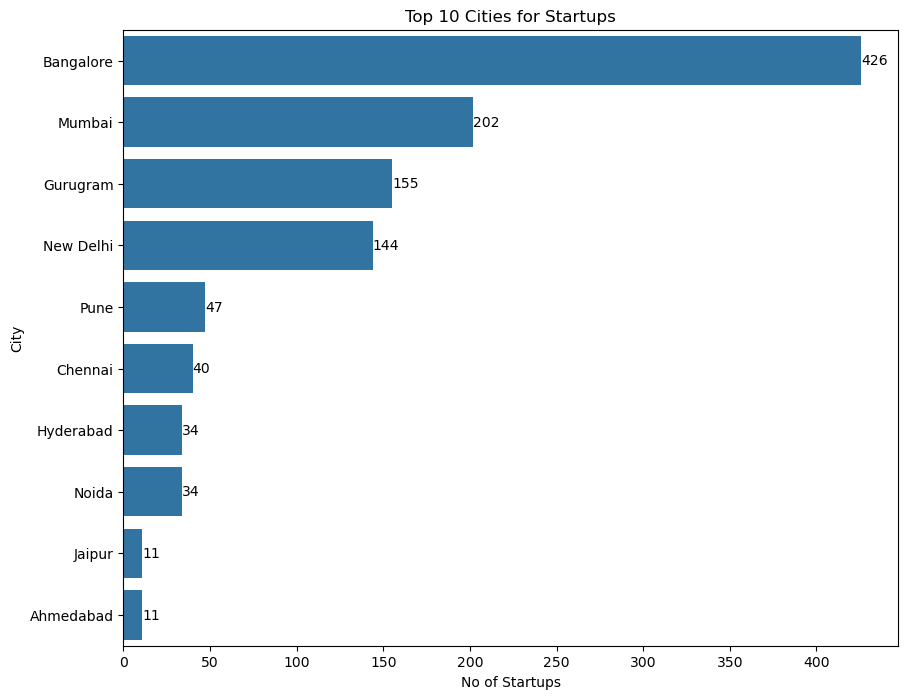

In [802]:
#To Get Top 10 Cities for Startups
Cities['Headquarters'] = pd.DataFrame(df['Headquarters'].value_counts().sort_values(ascending = False))
Cities= Cities.head(10)
plt.figure(figsize = (10,8))
axis = sns.barplot(x = Cities['Headquarters'], y = Cities.index)
axis.bar_label(axis.containers[0])
plt.title('Top 10 Cities for Startups')
plt.xlabel('No of Startups')
plt.ylabel('City')

# Top 10 Sectors for Startups

Text(0.5, 0, 'No of Startups')

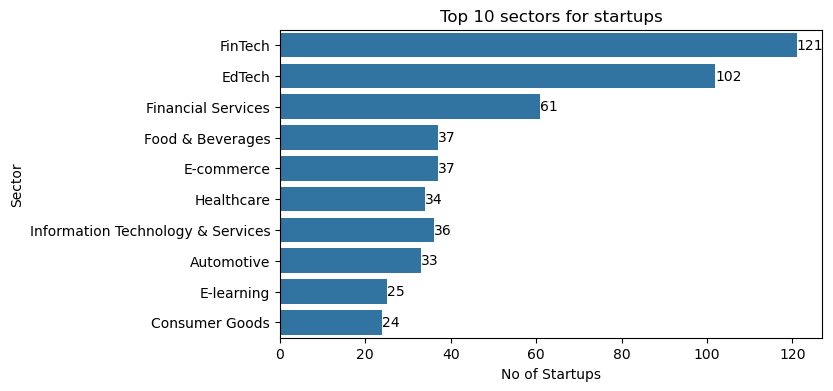

In [745]:
#To Get Top 10 Sectors for Startups
Sectors['Sector']=pd.DataFrame(df["Sector"].value_counts().sort_values(ascending=False))
Sectors=Sectors.head(10)
plt.figure(figsize=(7,4))
axis=sns.barplot(x=Sectors['Sector'],y=Sectors.index)
axis.bar_label(axis.containers[0])
plt.title("Top 10 sectors for startups")
plt.xlabel('No of Startups')

# Startups By year

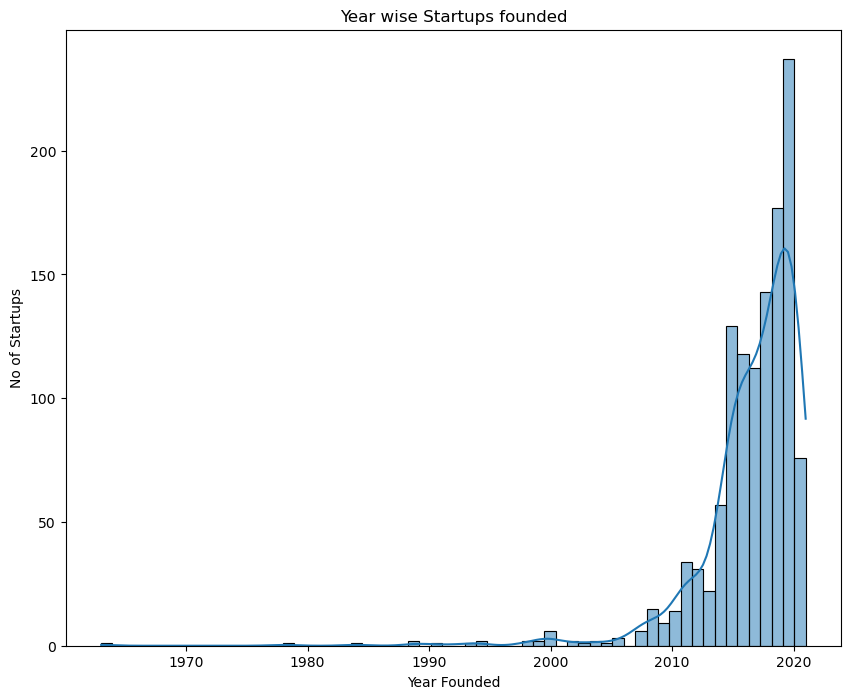

Maximum No of Startups founded in year 2020


In [747]:
#To get year wise startups
plt.figure(figsize = (10,8))
sns.histplot(df['Year Founded'],fill=True,kde=True)
plt.title('Year wise Startups founded')
plt.ylabel('No of Startups')
plt.show()
max_startups_year = round(df['Year Founded'].value_counts().sort_values(ascending = False).idxmax())
print(f'Maximum No of Startups founded in year {max_startups_year}')

# Top 5 Networth Companies

In [812]:
#To Get Top 5 Networth Companies
net_worth = df['Amount'].sort_values(ascending = False).head(5)
net_worth=net_worth/1000000
print(f'Top 5 Net worth Companies in millions \n{net_worth}')

Top 5 Net worth Companies in millions 
958     150000.0
1095      1000.0
170        840.0
938        800.0
641        660.0
Name: Amount, dtype: float64


# Summary

- Financial technology and educational technology are the sectors to which the majority of startups belong, accounting for a total share of 18.4% of all startups.

- The total number of startups equals 1208.

- Bangalore is home to the highest number of startups in the country.

- The number of startups has steeply increased since 2010 compared to the early 2000s, showing an increase of nearly 1100%.